In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
current_dir = '/content/drive/MyDrive/Apziva/Term Deposit Marketing/'

In [81]:
data_dir =current_dir + 'term-deposit-marketing-2020.csv'

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

In [82]:
# Start with loading all necessary libraries


import numpy as np
import pandas as pd


#visualizing data
import seaborn as sns  
import matplotlib.pyplot as plt 
import time

In [83]:
df  = pd.read_csv(data_dir)

# Exploring Dataset

In [84]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [85]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [87]:


df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [88]:

df[df==0].count()

age             0
job             0
marital         0
education       0
default         0
balance      3209
housing         0
loan            0
contact         0
day             0
month           0
duration        3
campaign        0
y               0
dtype: int64

In [89]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [90]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [91]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [92]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [93]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [94]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [95]:
def plot_distribution(df, feature, title):
    n_bins = int(df[feature].nunique())
    
    plt.figure(figsize = (10,5))
    plt.hist(x = feature, bins = n_bins, color = '#42929D', data = df, width=0.7)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(title)
    return plt.show()

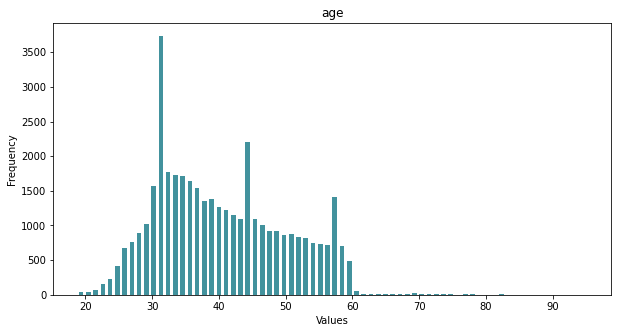

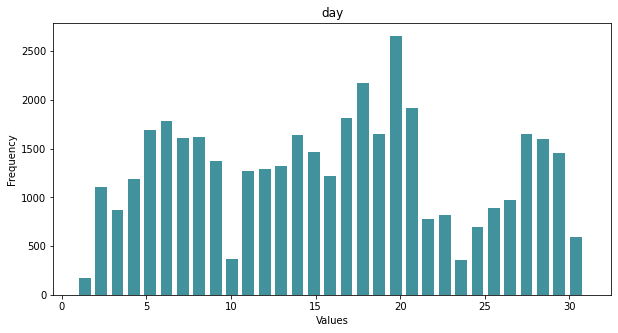

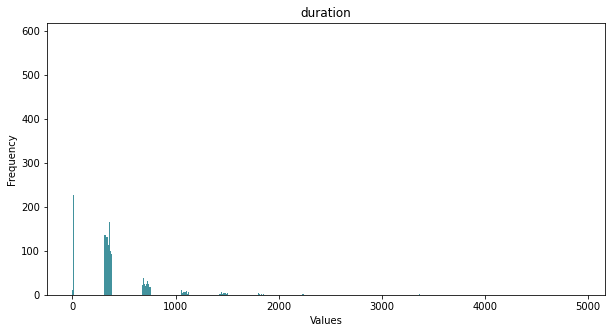

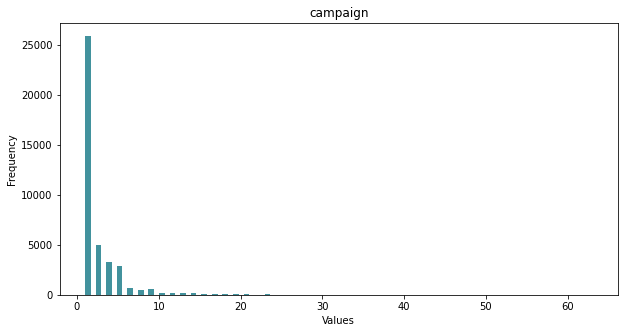

In [96]:
numeric_features = ['age', 'day', 'duration', 'campaign']

for feature in numeric_features:
  plot_distribution(df, feature, feature)

In [97]:
def plot_cont_distribution(df, feature, title):
    #n_bins = int(df[feature].nunique())
    
    plt.figure(figsize = (10,5))
    plt.plot(df['feature'], width=0.7)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(title)
    return plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facd909e690>]],
      dtype=object)

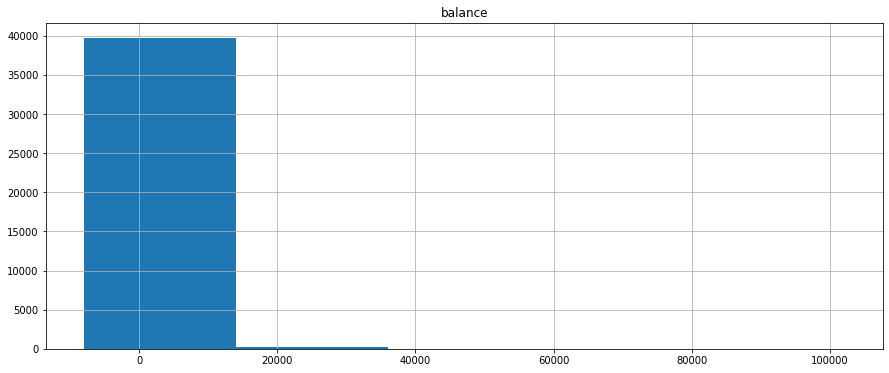

In [98]:
df.hist(column=['balance'],bins=5, figsize=(15,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facd901ad90>,
      dtype=object)

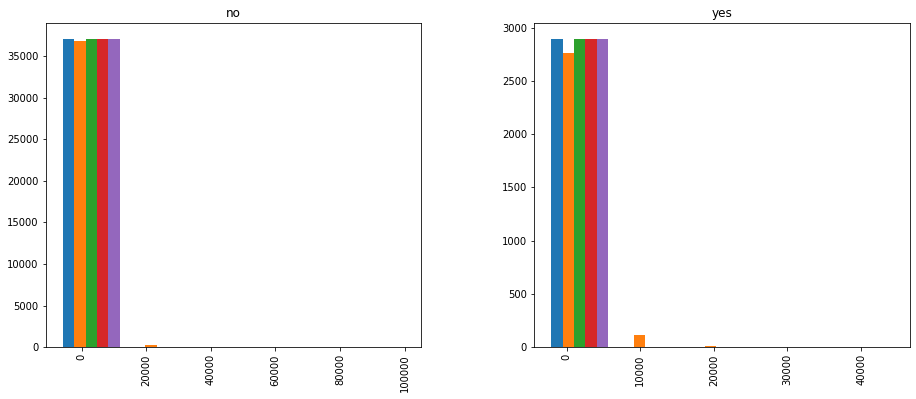

In [99]:
df.hist(column=['balance'], by= "y", bins=5, figsize=(15,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

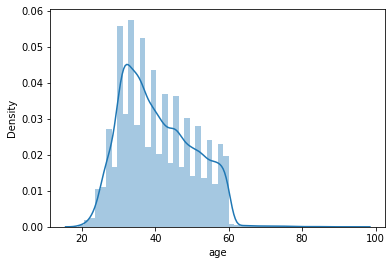

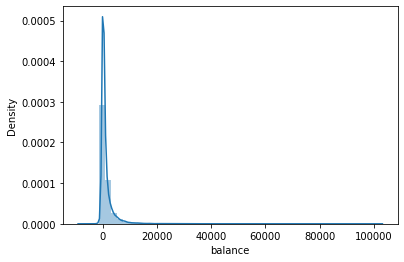

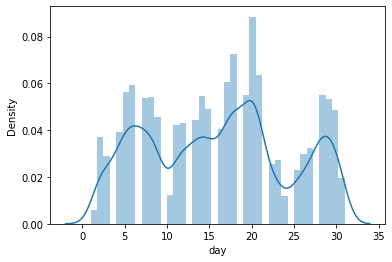

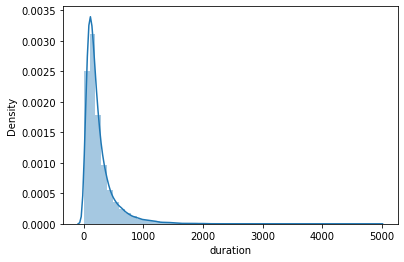

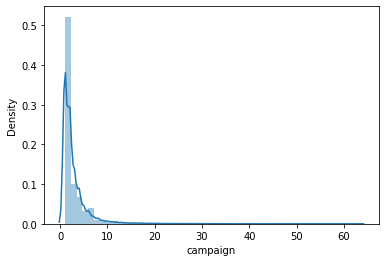

In [100]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

# Feature Engineering

In [101]:
#convert yes no to 0 and 1

In [102]:
def convert_yes_no(value):
    if value == 'yes':
        return 1
    else:
        return 0

In [103]:
df['y'] = df['y'].apply(lambda x:convert_yes_no(x))

In [104]:
df['housing'] = df['housing'].apply(lambda x:convert_yes_no(x))

In [105]:
df['loan'] = df['loan'].apply(lambda x:convert_yes_no(x))

In [106]:
df['default'] = df['default'].apply(lambda x: convert_yes_no(x))

In [107]:
def to_numeric_month(month: str):
  months_num_pair = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
        'may':5,
        'jun':6,
        'jul':7,
        'aug':8,
        'sep':9,
        'oct':10,
        'nov':11,
        'dec':12
        }
  try:
    return months_num_pair[month]
  except:
    raise ValueError('given input is not a month')


In [108]:
df['month'] = df['month'].apply(lambda x: to_numeric_month(x))

In [109]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,0


# One Hot Encoding for the other variables

In [110]:
df = pd.get_dummies(df, columns=['marital'], prefix="marital", prefix_sep="_")

In [111]:
df = pd.get_dummies(df,columns=['education'], prefix='education', prefix_sep="_")

In [112]:
df = pd.get_dummies(df, columns=['contact'], prefix="contact", prefix_sep="_")

In [113]:
df = pd.get_dummies(df, columns=['job'], prefix="job", prefix_sep="_")

In [114]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,5,151,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,5,76,1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
df.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
y                      int64
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
job_admin              uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
dtype: object

In [116]:
# sns.pairplot(df)
# plt.show()

In [117]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
age,1.000000,-0.014857,0.081517,-0.179606,0.000041,-0.011689,0.095266,-0.036270,0.016204,-0.020273,0.161989,0.265630,-0.408589,0.177944,-0.095671,-0.068986,0.073293,-0.068206,0.120689,0.010386,-0.047348,-0.028956,0.027956,0.084920,-0.005302,0.333164,0.001712,-0.057227,-0.155146,-0.058308,0.008052,0.043904
default,-0.014857,1.000000,-0.070069,-0.019229,0.075006,0.006287,0.024472,-0.008597,0.012135,-0.006559,0.016748,-0.016458,0.005893,-0.000885,0.011528,-0.012513,0.000959,-0.002889,-0.015149,0.010602,-0.009384,0.004706,0.025645,0.000017,-0.000951,-0.003878,0.004233,-0.003038,-0.013429,-0.004516,0.007232,-0.006397
balance,0.081517,-0.070069,1.000000,-0.049946,-0.080596,0.011662,0.099736,0.014072,-0.008137,0.030232,-0.025910,0.023683,-0.007168,-0.020949,-0.063920,0.083069,0.011639,0.004086,0.029116,-0.018851,-0.024774,-0.041461,0.011692,0.003044,0.072172,0.015917,0.015771,-0.033618,0.000575,-0.012655,0.010020,0.010672
housing,-0.179606,-0.019229,-0.049946,1.000000,0.004266,-0.050622,-0.161402,0.022455,-0.054823,-0.054336,-0.004691,0.000680,0.002656,0.011533,0.093628,-0.098019,-0.036128,-0.141946,-0.059696,0.177530,0.039440,0.156122,0.003303,-0.086038,-0.067999,-0.112274,-0.032204,0.062391,-0.034034,-0.032180,-0.046197,-0.077605
loan,0.000041,0.075006,-0.080596,0.004266,1.000000,0.005838,0.044699,-0.003952,0.000582,-0.031029,0.015635,0.032651,-0.047122,-0.012951,0.065472,-0.041987,-0.047598,0.029800,-0.001727,-0.030119,0.025195,0.005674,0.038244,-0.016788,-0.037817,0.017406,-0.008934,0.031939,-0.047512,0.008396,-0.035591,-0.031734
day,-0.011689,0.006287,0.011662,-0.050622,0.005838,1.000000,0.142358,-0.032983,0.165429,-0.006420,-0.004055,0.005243,-0.002806,-0.029240,-0.010139,0.033773,0.002749,0.034320,0.037242,-0.054363,-0.008858,-0.035006,-0.003629,0.005355,0.026526,-0.002787,0.005080,-0.009461,-0.011183,0.031902,-0.005475,-0.009526
month,0.095266,0.024472,0.099736,-0.161402,0.044699,0.142358,1.000000,-0.021329,0.082301,-0.043784,0.004534,0.078751,-0.089598,-0.026221,-0.048553,0.085987,-0.025199,0.151014,0.033843,-0.173993,-0.041223,-0.074765,0.032590,0.034035,0.088300,-0.008003,0.032367,-0.035096,-0.066517,0.049305,-0.049130,0.006923
duration,-0.036270,-0.008597,0.014072,0.022455,-0.003952,-0.032983,-0.021329,1.000000,-0.088387,0.461169,0.007237,-0.029153,0.026703,-0.007313,0.006765,-0.000303,-0.003043,0.017624,-0.040379,0.001928,-0.008152,0.015951,0.000247,-0.007239,-0.010846,0.001675,0.008821,0.003569,-0.007175,-0.008469,0.017896,-0.007971
campaign,0.016204,0.012135,-0.008137,-0.054823,0.000582,0.165429,0.082301,-0.088387,1.000000,-0.040350,-0.019951,0.027962,-0.016179,0.004326,-0.027133,0.022487,0.009791,-0.017733,0.061620,-0.012468,-0.020156,-0.004635,-0.002619,0.002804,0.021105,-0.013881,0.004581,-0.010404,-0.008503,0.018915,-0.017052,0.017037
y,-0.020273,-0.006559,0.030232,-0.054336,-0.031029,-0.006420,-0.043784,0.461169,-0.040350,1.000000,0.014619,-0.056863,0.051721,-0.026786,-0.019683,0.046763,-0.007464,0.085433,-0.000842,-0.088408,0.008083,-0.032859,-0.007191,-0.015248,0.020291,0.024343,0.005029,-0.014645,0.037384,0.000234,0.009463,-0.000018


In [118]:
#separate the Target and Features
target = df['y'] 
features = df.drop(['y'], axis=1)

In [119]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [120]:
features.head()

,age,default,balance,housing,loan,day,month,duration,campaign,marital_divorced,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,5,151,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,5,76,1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
features.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
job_admin              uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
dtype: object

# Imbalanced Data Tackling - Resampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


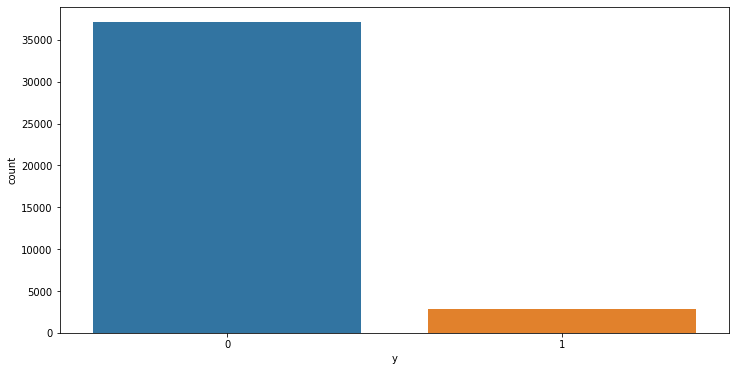

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(df['y'])

In [123]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [124]:
#Define SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [125]:
X_res, y_res = resample.fit_resample(features, target)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


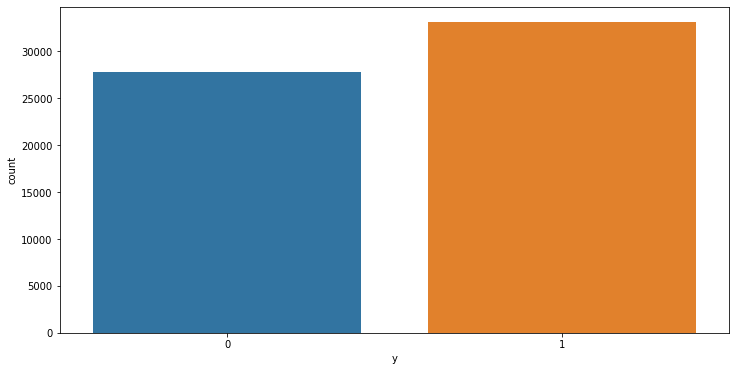

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(y_res)

# Train Logistic Regression Model

In [127]:
def conf_matrix(actual, predicted):
    """
      Function to generate confusion matrix from the predicted and actual classes

    """
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20},cmap="Blues")

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [128]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
#model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Model Training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV


#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score



#feature importance
import eli5
from eli5.sklearn import PermutationImportance

In [133]:
trans = StandardScaler()
new_features_scaled = pd.DataFrame(trans.fit_transform(X_res), index=X_res.index, columns=X_res.columns)

In [134]:
clf = LogisticRegressionCV(cv=5, random_state=30).fit(new_features_scaled, y_res)

In [135]:
best_clf = clf.fit(new_features_scaled,y_res)

In [136]:
scores = cross_val_score(best_clf, new_features_scaled,y_res, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  return np.array(coefs), np.array(Cs), n_iter
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  retur

In [137]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.05



The Training Score: 96.99525739698377 

The Accuracy is : 0.9699525739698377


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     27831
           1       0.99      0.96      0.97     33106

    accuracy                           0.97     60937
   macro avg       0.97      0.97      0.97     60937
weighted avg       0.97      0.97      0.97     60937



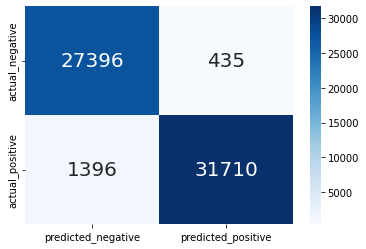

In [138]:
y_predict_logit = best_clf.predict(new_features_scaled)
acc_logit = accuracy_score(y_res, y_predict_logit)
print("\nThe Training Score: {} \n".format(best_clf.score(new_features_scaled,y_res)*100))
print('The Accuracy is : {}\n\n'.format(acc_logit))
cm_logit = conf_matrix(y_res, y_predict_logit)
print(classification_report(y_res, y_predict_logit))

In [139]:
perm = PermutationImportance(best_clf, random_state=1).fit(new_features_scaled, y_res)


Weight,Feature
0.1598 ± 0.0024,duration
0.0689 ± 0.0008,marital_married
0.0594 ± 0.0008,job_management
0.0568 ± 0.0007,job_blue-collar
0.0488 ± 0.0003,job_technician
0.0448 ± 0.0004,marital_single
0.0386 ± 0.0012,education_secondary
0.0355 ± 0.0003,contact_unknown
0.0293 ± 0.0003,job_admin
0.0277 ± 0.0003,job_services


In [140]:
eli5.show_weights(perm, feature_names = new_features_scaled.columns.tolist())

Weight,Feature
0.1598 ± 0.0024,duration
0.0689 ± 0.0008,marital_married
0.0594 ± 0.0008,job_management
0.0568 ± 0.0007,job_blue-collar
0.0488 ± 0.0003,job_technician
0.0448 ± 0.0004,marital_single
0.0386 ± 0.0012,education_secondary
0.0355 ± 0.0003,contact_unknown
0.0293 ± 0.0003,job_admin
0.0277 ± 0.0003,job_services


# Most Important Feature : Duration

A customer's last contact duration is the most important feature for predicting whether or not they will subscribe to the product.


# Segmenting Customers Who Buy the Product


In [146]:
from sklearn.cluster import KMeans

In [142]:
df_bought = df[df['y']==1]

In [143]:
df_bought

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
83,59,0,2343,1,0,5,5,1042,1,1,...,0,0,0,0,0,0,0,0,0,0
86,56,0,45,0,0,5,5,1467,1,1,...,0,0,0,0,0,0,0,0,0,0
87,41,0,1270,1,0,5,5,1389,1,1,...,0,0,0,0,0,0,0,1,0,0
129,55,0,2476,1,0,5,5,579,1,1,...,0,0,0,0,0,1,0,0,0,0
168,54,0,184,0,0,5,5,673,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,29,0,637,1,0,3,6,340,1,1,...,0,0,1,0,0,0,0,0,0,0
39988,55,0,2383,0,0,3,6,591,2,1,...,0,0,1,0,0,0,0,0,0,0
39990,26,0,1231,1,0,3,6,385,2,1,...,0,0,0,0,0,0,0,1,0,0
39996,30,0,3340,0,0,3,6,238,3,1,...,0,0,1,0,0,0,0,0,0,0


In [145]:
#Separate X and Y 
X=df_bought.drop('y',axis=1)
Y=df_bought['y']

In [148]:
#Calculate inertia/within-cluster sum-of-squares criterion for each value of k
inertia=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(X)
    inertia.append(km.inertia_)

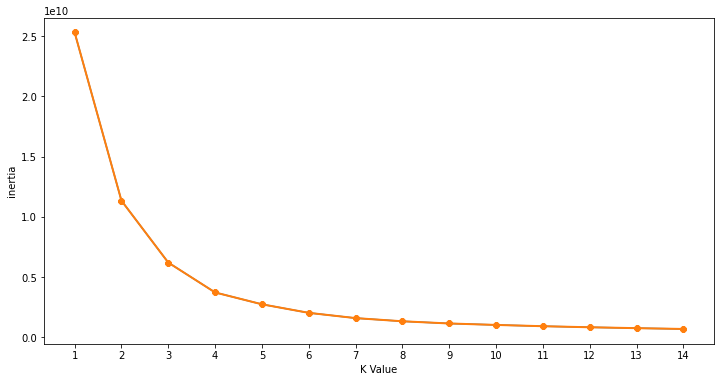

In [149]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15),inertia)
plt.plot(range(1,15),inertia, linewidth=2, marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("inertia")
plt.show()

In [150]:
kmeans_optimal = KMeans(n_clusters=4)

In [151]:
kmeans_optimal.fit(X)

KMeans(n_clusters=4)

In [152]:
y=kmeans_optimal.predict(X)

In [153]:
df_bought["label"] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
df_bought['label']

83       3
86       0
87       0
129      3
168      0
        ..
39986    0
39988    3
39990    0
39996    3
39997    0
Name: label, Length: 2896, dtype: int32

In [163]:
from collections import Counter
Counter(kmeans_optimal.labels_)

Counter({3: 539, 0: 2219, 2: 18, 1: 120})

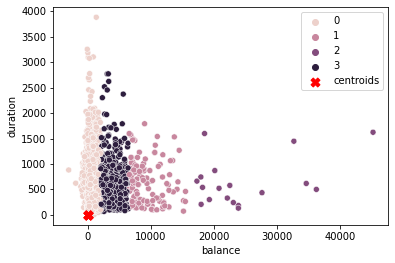

In [168]:
sns.scatterplot(data=df_bought, y="duration", x="balance", hue=kmeans_optimal.labels_)
plt.legend()
plt.show()

They are clustered based on the balance. We can see that the largest group of buyers are the ones with a balance on the lower side. We should prioritize this segment of the customer.

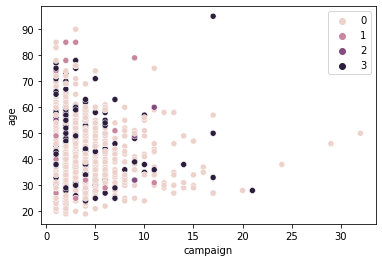

In [173]:
sns.scatterplot(data=df_bought, y="age", x="campaign", hue=kmeans_optimal.labels_)
plt.show()